# Trabajo Integrador Parte 4

Nombre:

Dentro de la carpeta de `data/` vamos a poder encontrar 3 datasets:

- Pokemon (Problema de clasificacion Binaria): La intención es tratar de predecir si basada en la información que tenemos podemos estimar si la carta que estamos viendo es Legendaria o no (Booleano).
- Heart Disease (Problema de clasificacion Binaria): A partir de este dataset vamos a tratar de determinar si una persona basado en ciertos datos tiene asociado una enfermedad cardiaca.
- Challenger USA Space Shuttle O-Ring Data Set (Regresion multivariada): En este dataset encontramos información sobre varios despegues del space shuttle, la intención de este problema es tratar de predecir cuanto será la cantidad de O-Rings que fallan dadas las condiciones de despegue.

> Para la presentación de sus trabajos prácticos **Elijan 1 de los 3 datasets**

# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar datos

Cargar los datos de entrenamiento.

Recordemos que para todos los datasets tenemos el archivo `columns.csv` que contiene el nombre y descripción de cada columna en el mismo orden que van a encontrar los datos.

En los casos de datos con extensión  `*.data` vamos a tener que leerlo utilizando `pd.read_data('myfile.data', sep = ',', header = 0, names = my_cols)`

De esta manera si quisieramos cargar datos por ejemplo de Nasa deberiamos poner algo asi


```python
## Importing python earlier

my_cols = pd.read_csv('./data/nasa_orings/columns.csv').column.values.tolist()

my_data = pd.read_csv('./data/nasa_orings/o-ring-erosion-or-blowby.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )
```

In [6]:
DATASET_PATH = "./data/heart_disease/"

In [7]:
my_cols = pd.read_csv(DATASET_PATH + 'columns.csv').column.values.tolist()

my_data = pd.read_csv(DATASET_PATH + 'processed.cleveland.data',
                       delimiter=',',
                       header=0,
                       names = my_cols
                    )

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

Vamos a considerar:

- Para escalar datos: `sklearn.preprocessing.StandardScaler()`
- Para completar valores nulos: `sklearn.impute.SimpleImputer()` [Quickguide](https://scikit-learn.org/stable/modules/impute.html)
- Para reduccion de dimensiones (sobre todo para visualizar los datos): PCA o [T-SNE](https://builtin.com/data-science/tsne-python) (Solo para visualización)
- Para codificar variables categóricas: `sklearn.preprocessing.OneHotEncoder()`

In [8]:
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [9]:
my_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [10]:
# Datos faltantes:
missing_values = my_data.isna().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [11]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "thalach"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target = "num"

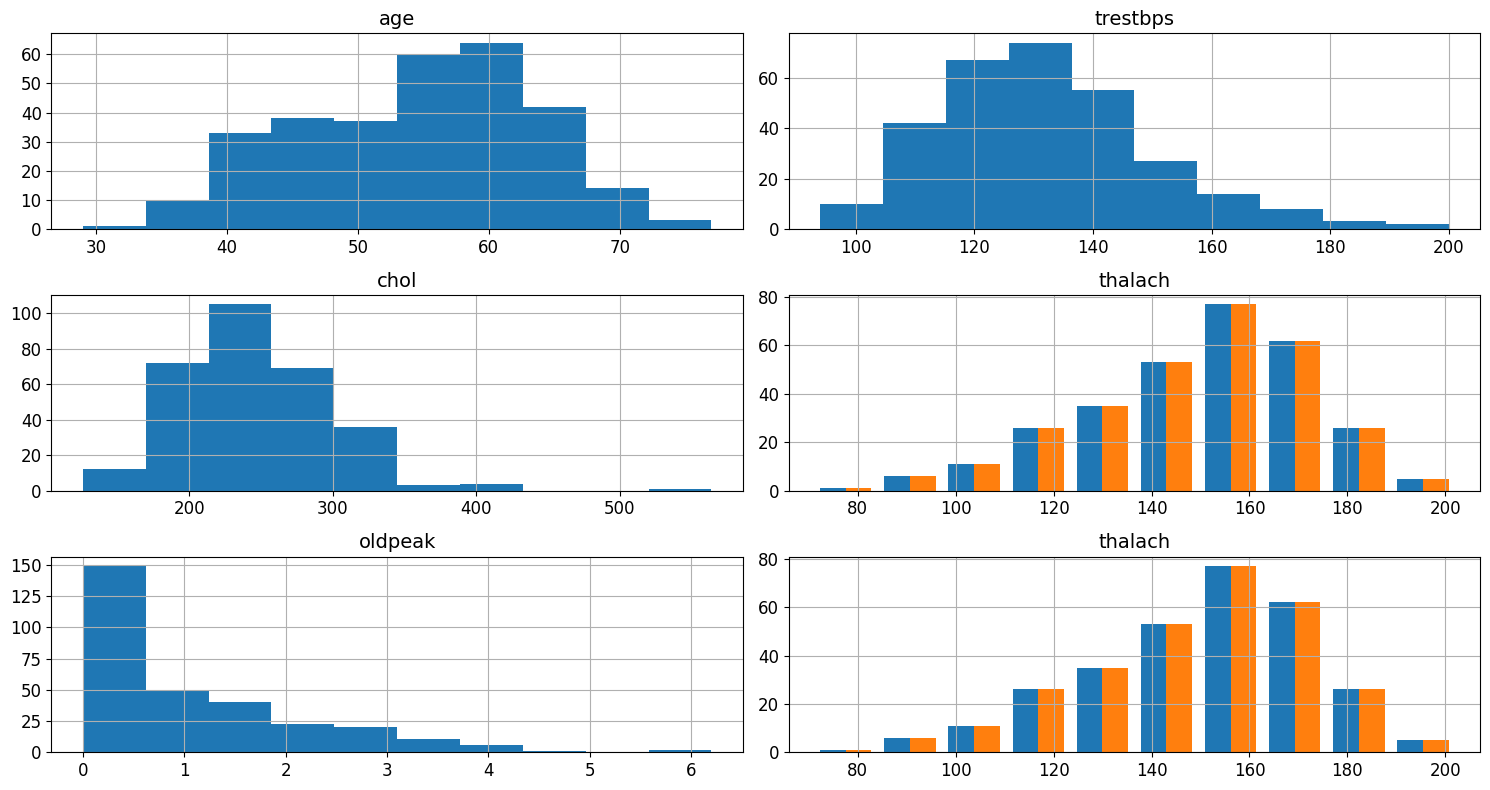

In [12]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(15,8),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
    
display_dataset_distributions(my_data[numerical_features])

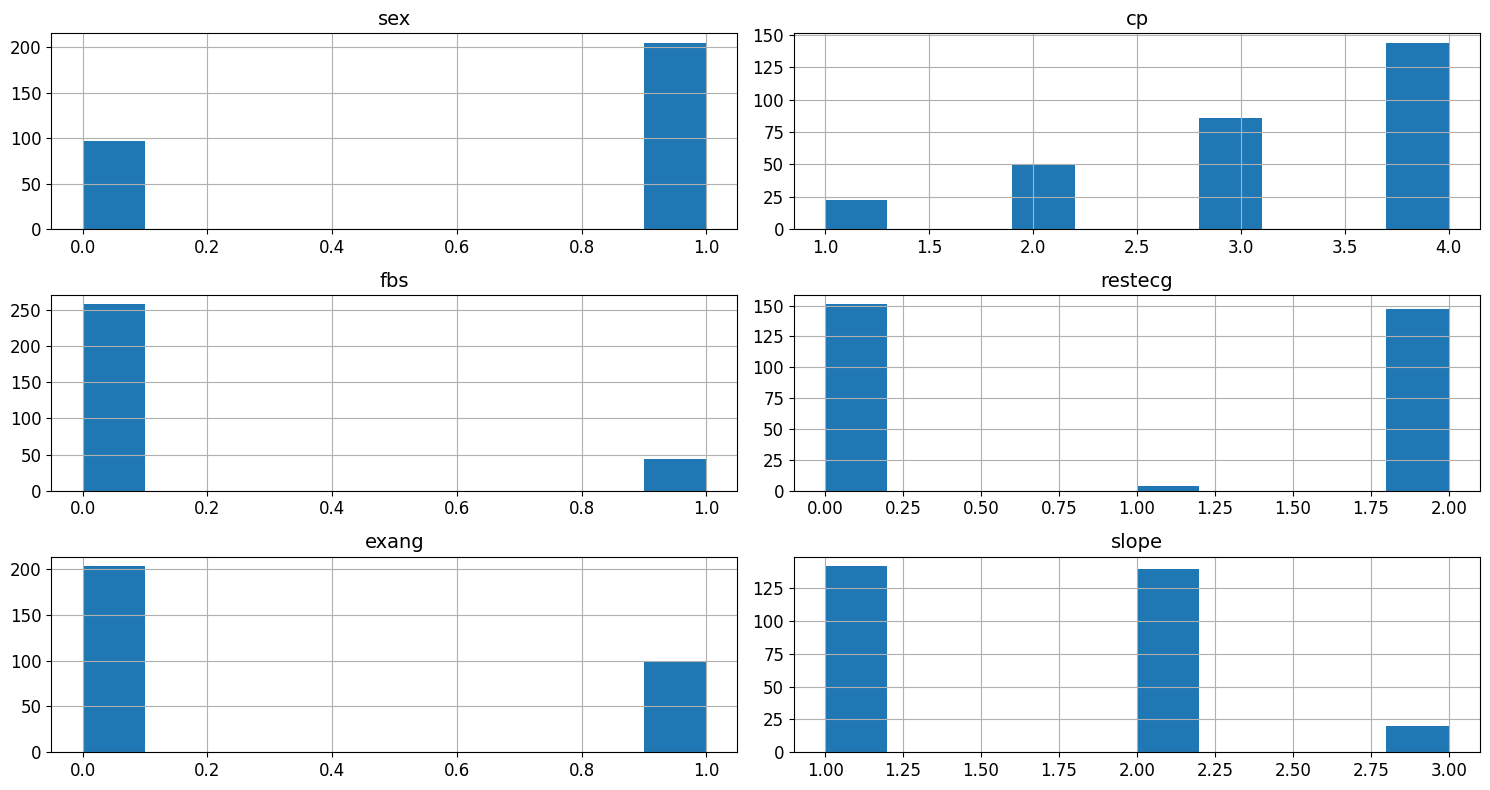

In [13]:
display_dataset_distributions(my_data[categorical_features])

# Preprocesamiento de datos

### Binarizar a la variable target

In [14]:
my_data[target].value_counts()

num
0    163
1     55
2     36
3     35
4     13
Name: count, dtype: int64

[1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1
 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1
 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0
 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1
 0 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1
 1 1 1 1 1 0]


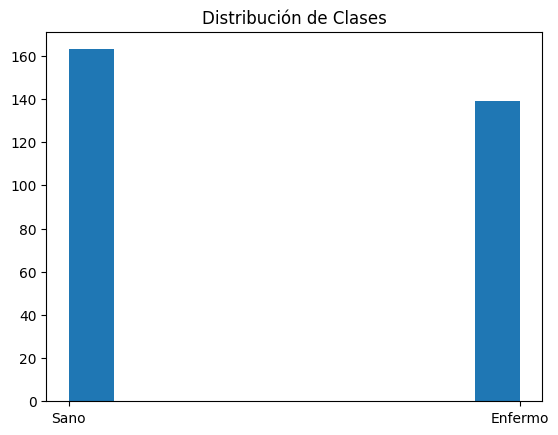

In [15]:
# Crear clases binarias
y = my_data[target].values

sano_mask = y == 0
enfermo_mask = y > 0

y_class = y.copy()

y_class[sano_mask] = 0
y_class[enfermo_mask] = 1

print(y_class)

plt.hist(y_class)
plt.title('Distribución de Clases')
plt.xticks([0, 1], ['Sano', 'Enfermo'])
plt.show()

In [16]:
y_class_df = pd.DataFrame(y_class, columns=["target"])
my_data = pd.concat([my_data, y_class_df], axis=1)
my_data.drop(columns=["num"], inplace=True)
my_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Eliminar filas con valores desconocidos ("?")

In [17]:
unkown_values = (my_data[categorical_features] == '?').sum()
print(unkown_values)

sex        0
cp         0
fbs        0
restecg    0
exang      0
slope      0
ca         4
thal       2
dtype: int64


In [18]:
rows_with_unknown_values = my_data[categorical_features].apply(lambda x: '?' in x.values, axis=1)
my_data_cleaned = my_data.loc[~rows_with_unknown_values]
num_rows_dropped = len(my_data) - len(my_data_cleaned)
print("Número de filas eliminadas:", len(my_data) - len(my_data_cleaned), " (",round(num_rows_dropped/len(my_data)*100,2),"%)")
my_data = my_data_cleaned


Número de filas eliminadas: 6  ( 1.99 %)


### One hot encoding

In [19]:
# Valores que puede tomar cada columna categorica
unique_values = my_data[categorical_features].apply(lambda x: x.unique())
print(unique_values)

sex                  [1.0, 0.0]
cp         [4.0, 3.0, 2.0, 1.0]
fbs                  [0.0, 1.0]
restecg         [2.0, 0.0, 1.0]
exang                [1.0, 0.0]
slope           [2.0, 3.0, 1.0]
ca         [3.0, 2.0, 0.0, 1.0]
thal            [3.0, 7.0, 6.0]
dtype: object


In [20]:
my_data_encoded = pd.get_dummies(my_data, columns=categorical_features, drop_first=True)
my_data_encoded.drop(numerical_features, axis=1).head()

,target,sex_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_1.0,restecg_1.0,restecg_2.0,exang_1.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,1,True,False,False,True,False,False,True,True,True,False,False,False,True,False,False
1,1,True,False,False,True,False,False,True,True,True,False,False,True,False,False,True
2,0,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False
4,0,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
my_data_encoded = pd.get_dummies(my_data[categorical_features])
my_data_encoded.head()

,sex,cp,fbs,restecg,exang,slope,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,1.0,4.0,0.0,2.0,1.0,2.0,False,False,False,True,True,False,False
1,1.0,4.0,0.0,2.0,1.0,2.0,False,False,True,False,False,False,True
2,1.0,3.0,0.0,0.0,0.0,3.0,True,False,False,False,True,False,False
3,0.0,2.0,0.0,2.0,0.0,1.0,True,False,False,False,True,False,False
4,1.0,2.0,0.0,0.0,0.0,1.0,True,False,False,False,True,False,False


### Escalado de datos


In [22]:
scaled_data = my_data.copy()
scaler = StandardScaler()
scaled_data[numerical_features] = scaler.fit_transform(scaled_data[numerical_features])

### PCA transform

In [23]:
pca = PCA(n_components=0.9).fit(scaled_data[numerical_features])
X_transformed = pca.transform(scaled_data[numerical_features])
print("Componentes principales de pca (90% de explicabilidad): {}".format(pca.n_components_))

Componentes principales de pca (90% de explicabilidad): 4


# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

### Dividir en train, test y validation

In [29]:
p_test = .15
p_val = .15

X_train_temp, X_test, y_train_temp, y_test = train_test_split(
    my_data.drop(['target'], axis=1),
    my_data['target'],
    test_size=p_test,
    shuffle=True,
    stratify=my_data['target']
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_temp,
    y_train_temp,
    test_size=(p_val / (1 - p_test)),
    shuffle=True,
    stratify=y_train_temp
)


print("Train size:", len(X_train))
print("Tests size:", len(X_test))
print("Validation size:", len(X_val))

Train size: 206
Tests size: 45
Validation size: 45
